In [126]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy as sci
import seaborn as sns
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import os
for dirname, _, filenames in os.walk('heart.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [ ]:
#Reading the CSV (heart.csv) File

In [127]:
df = pd.read_csv('heart.csv')

In [128]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [129]:
Data contains; 

age - age in years 
sex - (1 = male; 0 = female) 
cp - chest pain type 
trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
chol - serum cholestoral in mg/dl 
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
restecg - resting electrocardiographic results 
thalach - maximum heart rate achieved 
exang - exercise induced angina (1 = yes; 0 = no) 
oldpeak - ST depression induced by exercise relative to rest 
slope - the slope of the peak exercise ST segment 
ca - number of major vessels (0-3) colored by flourosopy 
thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
target - have disease or not (1=yes, 0=no)

SyntaxError: invalid syntax (<ipython-input-129-2a9540dc3b91>, line 1)

In [130]:
#Data Exploration 

SyntaxError: invalid syntax (<ipython-input-130-7a0546a61a00>, line 1)

In [131]:
df.shape

(303, 14)

In [132]:
#Distribution of values based on data summary: count, mean,std,minimum, first quartile, median, third quartile, and maximum

In [133]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#Types of variable the data set 

In [134]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
#Cleaning the data

In [135]:
dup_count = df.duplicated()
df[dup_count]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [136]:
dup = df.loc[df['age'] == 38]
dup

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0


In [137]:
df= df.drop(163)
df.shape

(302, 14)

In [138]:
null_count = df.isnull().sum()
null_count

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#Male vs Female patients age distribution

In [173]:
df.groupby('sex').size()

sex
0     96
1    206
dtype: int64

Text(0.5, 6.79999999999999, 'sex (0= female, 1= male)')

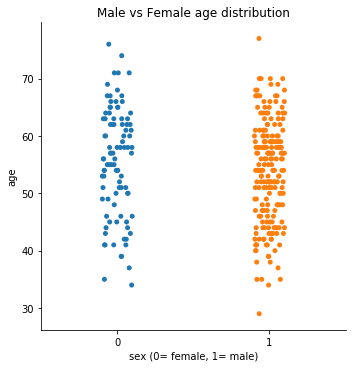

In [140]:
sns.catplot(x="sex", y="age", data=df)
plt.title('Male vs Female patients age distribution')
plt.xlabel('sex (0= female, 1= male)')

In [ ]:
#Pairwise correlation of all the columns in the dataframe

In [141]:
df_corr = df.corr()
df_corr.style.background_gradient(cmap = plt.get_cmap('bwr'))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1,-0.0949625,-0.0631066,0.283121,0.207216,0.119492,-0.11159,-0.395235,0.0932158,0.20604,-0.164124,0.302261,0.0653173,-0.221476
sex,-0.0949625,1,-0.0517395,-0.0576469,-0.195571,0.0460222,-0.0603505,-0.0464387,0.14346,0.0983217,-0.0329896,0.11306,0.211452,-0.283609
cp,-0.0631066,-0.0517395,1,0.0464864,-0.0726816,0.0960181,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.16037,0.43208
trestbps,0.283121,-0.0576469,0.0464864,1,0.125256,0.178125,-0.115367,-0.0480227,0.0685263,0.1946,-0.122873,0.0992483,0.0628696,-0.146269
chol,0.207216,-0.195571,-0.0726816,0.125256,1,0.0114283,-0.147602,-0.0053085,0.0640989,0.050086,0.000416658,0.0868779,0.0968104,-0.0814372
fbs,0.119492,0.0460222,0.0960181,0.178125,0.0114283,1,-0.0830811,-0.00716929,0.0247288,0.00451427,-0.0586535,0.144935,-0.0327524,-0.026826
restecg,-0.11159,-0.0603505,0.041561,-0.115367,-0.147602,-0.0830811,1,0.0412098,-0.0688066,-0.0562507,0.0904022,-0.0831124,-0.0104732,0.134874
thalach,-0.395235,-0.0464387,0.293367,-0.0480227,-0.0053085,-0.00716929,0.0412098,1,-0.377411,-0.342201,0.384754,-0.228311,-0.0949099,0.419955
exang,0.0932158,0.14346,-0.392937,0.0685263,0.0640989,0.0247288,-0.0688066,-0.377411,1,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.20604,0.0983217,-0.146692,0.1946,0.050086,0.00451427,-0.0562507,-0.342201,0.286766,1,-0.576314,0.23656,0.20909,-0.429146


In [ ]:
#Distribution showing patients with heart disease and those without heart disease

In [142]:
df.target.value_counts()

1    164
0    138
Name: target, dtype: int64

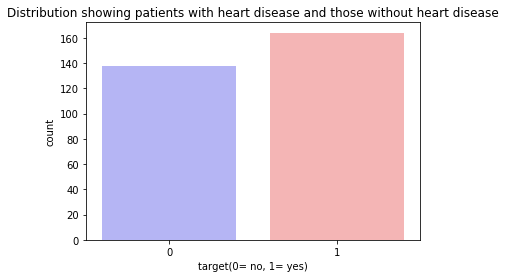

In [143]:
sns.countplot(x="target", data=df, palette="bwr")
plt.title('Distribution showing patients with heart disease and those without heart disease')
plt.xlabel('target(0= no, 1= yes)')
plt.show()

In [144]:
Patients_without_disease = len(df[df.target == 0])
Patients_with_disease = len(df[df.target == 1])
print("Percentage of Patients without Heart Disease: {:.2f}%".format((Patients_without_disease / (len(df.target))*100)))
print("Percentage of Patients with Heart Disease: {:.2f}%".format((Patients_with_disease/ (len(df.target))*100)))

Percentage of Patients without Heart Disease: 45.70%
Percentage of Patients with Heart Disease: 54.30%


In [174]:
df.groupby('target').describe()

age                                                        sex  \
        count       mean       std   min    25%   50%   75%   max  count   
target                                                                     
0       138.0  56.601449  7.962082  35.0  52.00  58.0  62.0  77.0  138.0   
1       164.0  52.585366  9.511957  29.0  44.75  52.0  59.0  76.0  164.0   

                  ... slope_1      slope_2                                     \
            mean  ...     75%  max   count      mean       std  min  25%  50%   
target            ...                                                           
0       0.826087  ...     1.0  1.0   138.0  0.253623  0.436669  0.0  0.0  0.0   
1       0.560976  ...     1.0  1.0   164.0  0.646341  0.479569  0.0  0.0  1.0   

                   
         75%  max  
target             
0       0.75  1.0  
1       1.00  1.0  

[2 rows x 168 columns]

In [ ]:
#Distribution of Heart Disease based on Age

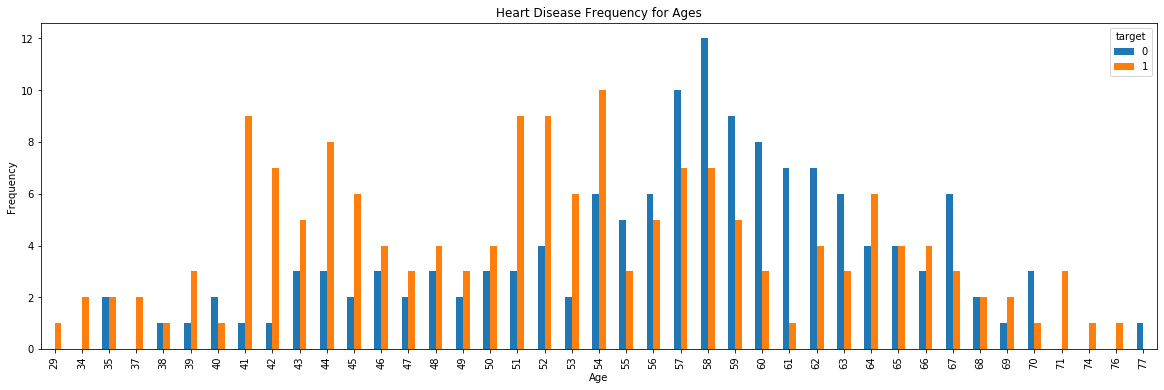

In [192]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

In [193]:
# Distribution of Heart Disease based on Sex

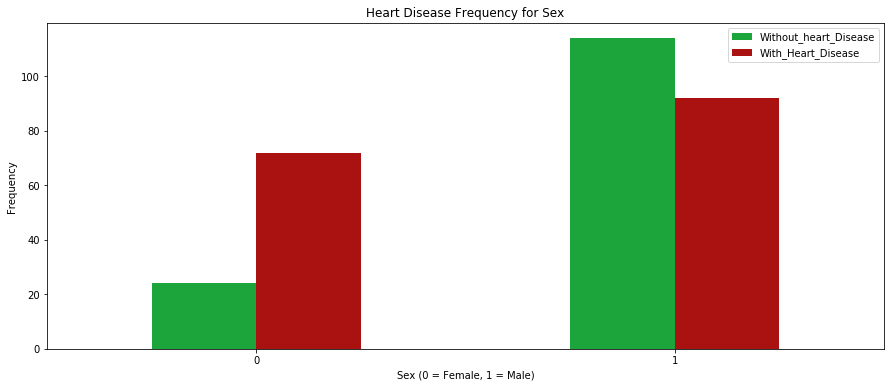

In [197]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Without_heart_Disease", "With_Heart_Disease"])
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Maximum Heart Rate Distribution According to age

In [206]:
df.groupby(['age','thalach']).size().reset_index().sort_values(0,ascending=False).head(20)

,age,thalach,0
185,58,165,2
209,60,160,2
23,41,172,2
171,57,174,2
93,51,142,2
89,50,163,2
176,58,131,2
22,41,168,2
31,42,178,2
199,59,162,2


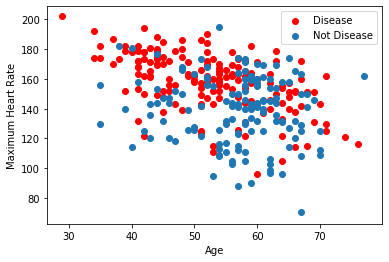

In [148]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [ ]:
#The Distibution Of Slope of The Peak Exercise ST Segment

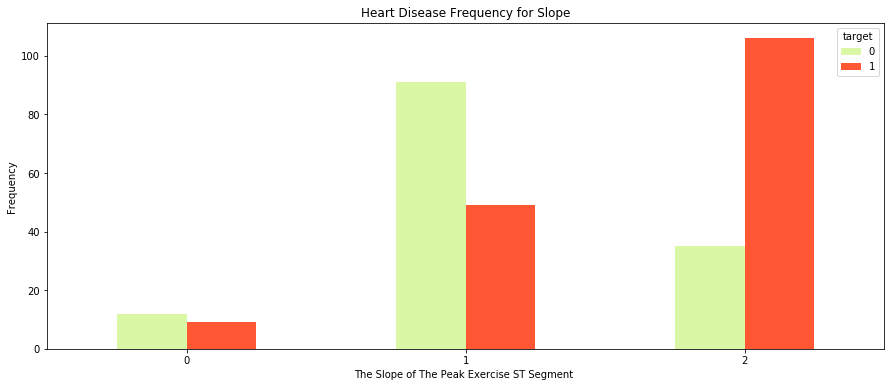

In [149]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Heart Disease Frequency According To FBS

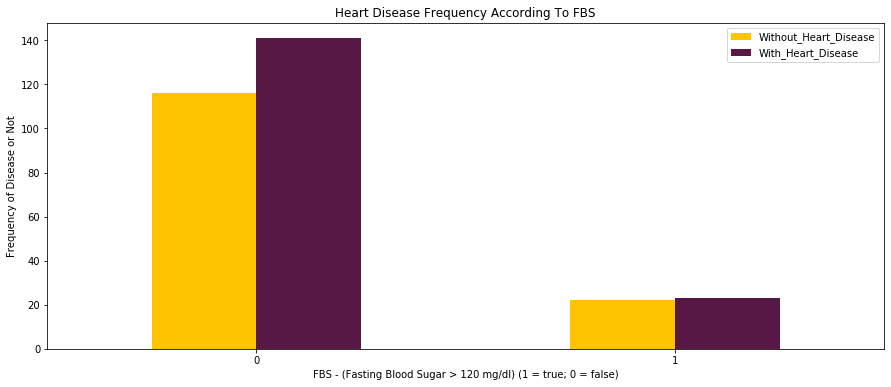

In [150]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Without_Heart_Disease", "With_Heart_Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

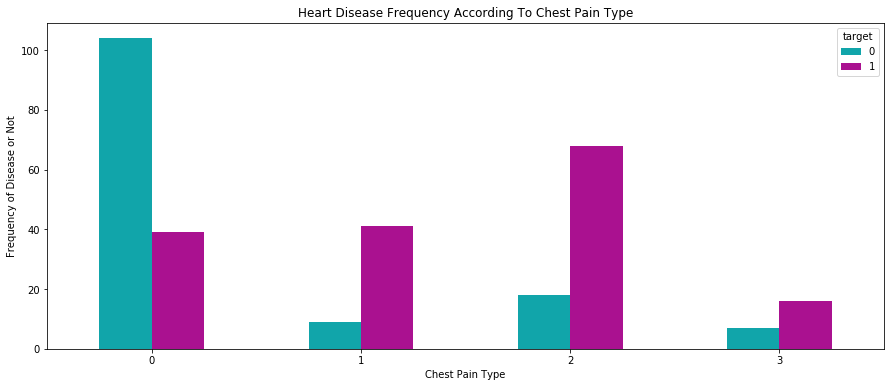

In [151]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [ ]:
#Creating Model for Logistic Regression


In [152]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [153]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [154]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [155]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [156]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [157]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [158]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [164]:
#initialize
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

In [165]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [166]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [167]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

In [168]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [169]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

iteration: 100
cost: 0.36539172254633256


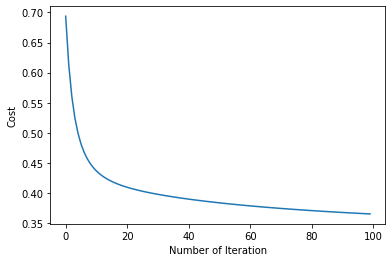

Manuel Test Accuracy: 88.52%


In [170]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)